# **Introduction**

## **Definition**

> **Market Basket Analysis**

Market Basket Analysis (MBA) is a data mining technique used in the field of business intelligence to discover relationships between products or items that are frequently bought together. The primary goal is to uncover patterns of co-occurrence and associations within a set of transactions or customer interactions. This analysis helps businesses understand customer behavior, improve sales strategies, optimize product placements, and enhance overall customer experience.

The term "market basket" refers to the collection of items that a customer buys during a single shopping trip. MBA examines the historical data of these transactions to identify patterns and associations, revealing which products tend to be purchased together. The insights gained from market basket analysis are valuable for various applications, such as:

1. **Cross-Selling:** Recommending related products to customers based on their purchasing patterns.
2. **Inventory Management:** Optimizing stock placement by grouping items that are frequently bought together.
3. **Promotion Planning:** Designing effective promotions or discounts for products that exhibit strong associations.
4. **Layout Optimization:** Arranging store layouts to encourage the purchase of associated items.

> **Association Rules**

Association rules are the outcome of market basket analysis. They are expressions that highlight the relationships and associations between items in a dataset of transactions. These rules are usually in the form of "if-then" statements, specifying the conditions under which certain items are likely to be bought together. The two essential components of association rules are:

1. **Antecedent (IF):** This represents the item or items that are present or conditionally present in the transactions. It is the part of the rule that defines the condition.

2. **Consequent (THEN):** This represents the item or items that are likely to be bought along with the items in the antecedent. It is the part of the rule that represents the result or recommendation.

In summary, market basket analysis and association rules provide valuable insights into customer behavior, enabling businesses to make informed decisions for marketing, sales, and overall business strategies.

---

$Note$: Association rules **do not** highlight the casualty. They highlight the relationship.

## **Itemset Generation**

A collection of one or more items grouped together. An itemset can be either a "singleton" (containing only one item) or a "set" with multiple items. In association rule mining, analysts examine the co-occurrence patterns of itemsets within transactions to discover meaningful associations.

### **Steps**

1. **Frequent Itemset Generation**
    1. **Calculate Support for Single Items:**
    - Start by counting the frequency of each individual item (singleton) in the dataset. This provides the support for each single item.
    
    2. **Generate Candidate Itemsets:**
    - Create candidate itemsets of length two by combining the frequent singleton items. These candidates are potential pairs of items that may form frequent itemsets.

    3. **Calculate Support for Candidate Itemsets:**
    - Calculate the support for each candidate itemset by counting the number of transactions in which the itemset occurs.

    4. **Prune Infrequent Itemsets:**
    - Remove candidate itemsets that do not meet the minimum support threshold. This pruning step helps focus on potentially frequent itemsets.

    5. **Generate Higher-Length Itemsets:**
    - Use the remaining frequent itemsets to generate candidate itemsets of higher lengths (e.g., triples, quadruples) by combining them.

    6. **Repeat and Prune:**
    - Repeatedly calculate support, prune infrequent itemsets, and generate higher-length candidates until no more frequent itemsets can be found.

2. **Association Rule Generation**
    Once frequent itemsets are identified, association rules can be generated by considering different combinations of antecedents and consequents within these itemsets.


The process is implemented using **Apriori algorithm**, which efficiently navigate the itemset space without explicitly enumerating all possible combinations. This algorithm leverage the anti-monotonicity property of support, which states that if an itemset is infrequent, any of its supersets must also be infrequent.

Frequent itemset generation is a key step in efficient association rule mining, helping to focus on relevant patterns and reducing computational complexity compared to a brute force approach.

### **Apriori Algorithm**

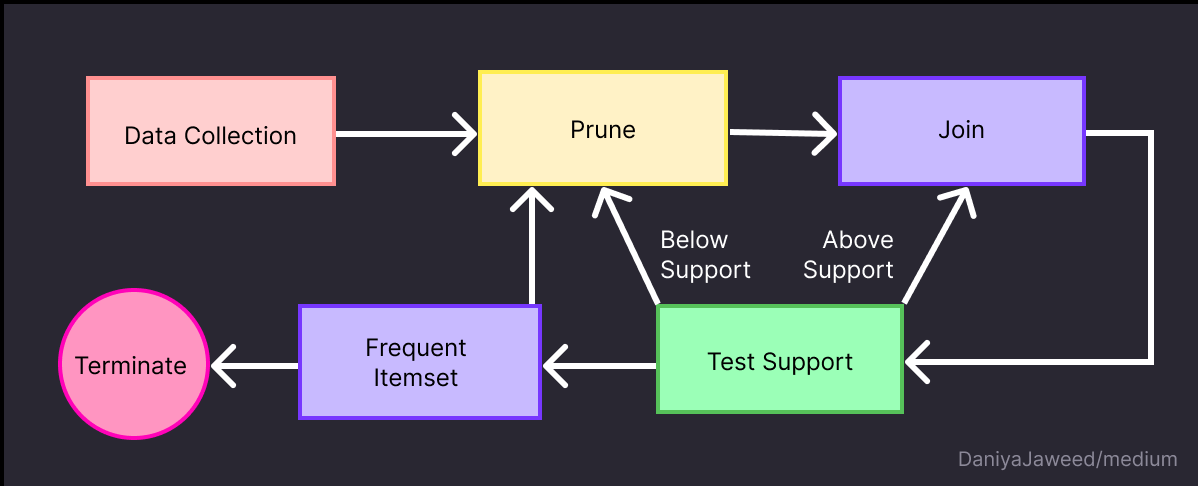

# DELETE (?)

**Overview:**
The Apriori algorithm is a classic association rule mining technique designed to discover interesting relationships between items in large datasets. Developed by Rakesh Agrawal and Ramakrishnan Srikant in 1994, Apriori is widely used for market basket analysis, where it identifies sets of products frequently purchased together. The algorithm follows the Apriori principle, leveraging the idea that if an itemset is frequent, all of its subsets must also be frequent.

**Steps:**

1. **Generate Frequent 1-itemsets (Singletons):**
   Identify all unique items in the dataset and calculate their support—the proportion of transactions containing each item.

2. **Generate Candidate k-itemsets:**
   Create candidate k-itemsets by combining frequent (k-1)-itemsets from the previous iteration. For k=2, this involves forming pairs of frequent singletons.

3. **Prune Infrequent k-itemsets:**
   Remove candidate k-itemsets with support below the minimum threshold, applying the Apriori principle to reduce the search space.

4. **Generate Candidate (k+1)-itemsets:**
   Repeat the process, generating candidate (k+1)-itemsets by combining frequent k-itemsets.

5. **Prune Infrequent (k+1)-itemsets:**
   Remove candidate (k+1)-itemsets with support below the threshold, continuing the iterative process until no more frequent itemsets can be found.

**Key Concepts:**

- **Apriori Principle:**
  The algorithm relies on the Apriori principle to prune the search space. If an itemset is frequent, all of its subsets must also be frequent.

- **Candidate Generation:**
  Apriori explicitly generates candidate itemsets and evaluates their support in each iteration, progressively increasing the length of itemsets.

- **Support and Confidence:**
  Support is used to measure the frequency of itemsets, while confidence quantifies the likelihood of a rule being true given the occurrence of its antecedent.

**Applications:**
The Apriori algorithm finds applications in diverse fields, including retail, healthcare, and web usage analysis. It aids in market basket analysis, recommendation systems, and identifying patterns in various transactional datasets.

**Advantages:**
- Simple and intuitive.
- Provides interpretable results.
- Suitable for datasets with moderate size.

**Challenges:**
- Computationally intensive for large datasets due to the generation of numerous candidate itemsets.
- Inefficient when applied to datasets with a low minimum support threshold.

In conclusion, the Apriori algorithm remains a foundational method for discovering association rules, offering insights into co-occurrence patterns in transactional data. While newer algorithms address some of its limitations, Apriori remains relevant and valuable in many practical scenarios.

# **Environment SetUp**

In this section, we will import all the libraries that will be required in the notebook.

In [15]:
# Main Package
import mlxtend

# Data
import pandas as pd
from csv import reader

# Data Processing
from mlxtend.preprocessing import TransactionEncoder

# Algorithms
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# NOT RECOMMENDED
import warnings
warnings.filterwarnings("ignore")

# Data Visualization
import matplotlib.pyplot as plt

# **Data Loading**

Loading the CSV file in this particular case is not straightforward due to the variable lengths of the itemsets. The file contains different itemsets with varying numbers of items, making it challenging to use standard CSV reading methods.

Instead of a simple one-liner using pandas, a more nuanced approach is required. To address this complexity, we leverage the ***reader*** from ***csv***, which allows us to read one line at a time.

This way, we can handle the variability in itemset lengths. The resulting data structure is not a pandas DataFrame, as one might typically expect when working with CSV files, but rather a list of lists.

Each inner list represents an itemset, accommodating the diverse lengths of the itemsets within the CSV file. This list-of-lists structure provides a suitable format for further processing and analysis of the association rules and itemsets.a

In [16]:
df = pd.read_csv("groceries - groceries.csv", header=None)
df = df.drop(0, axis=1)
df = df.drop(0)
df

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


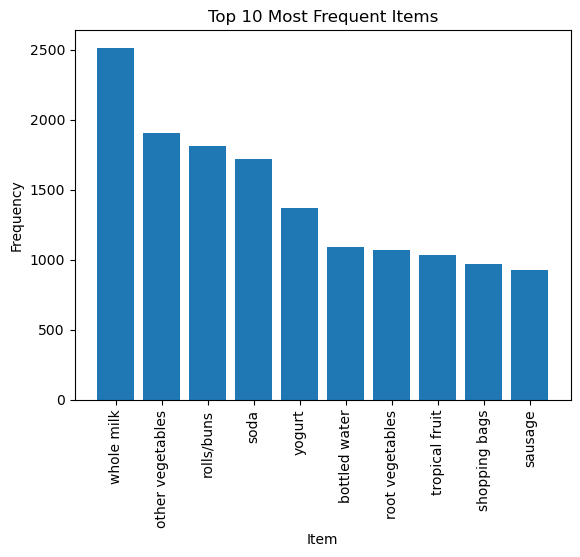

In [17]:
# Item frequency analysis
item_counts = df.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
top_items = item_counts.head(10)
plt.bar(top_items.index, top_items.values)
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=90)
plt.show()

In [40]:
len(item_counts)

169

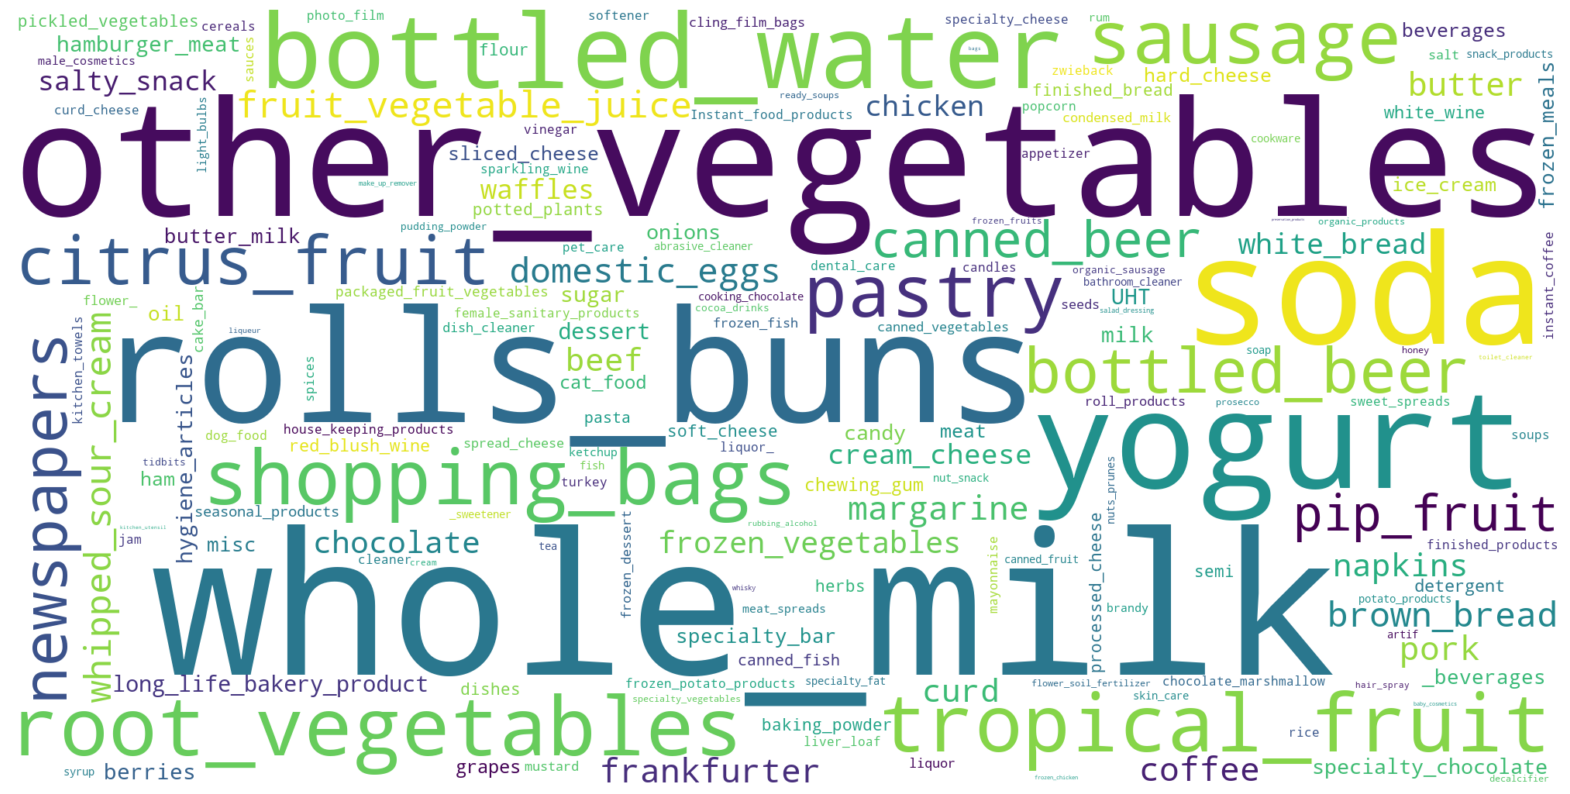

In [18]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
text = df.values.astype(str).tolist()
text = [[item for item in row if (str(item) != 'nan')&(item!='')] for row in text]

text = [item for sublist in text for item in sublist]
text = [w.replace(' ', '_') for w in text]
text = [w.replace('/', '_') for w in text]
text.sort()

wordcloud = WordCloud( background_color="white",width=2000, height=1000,max_words=500,collocations=False).generate(" ".join(text))
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

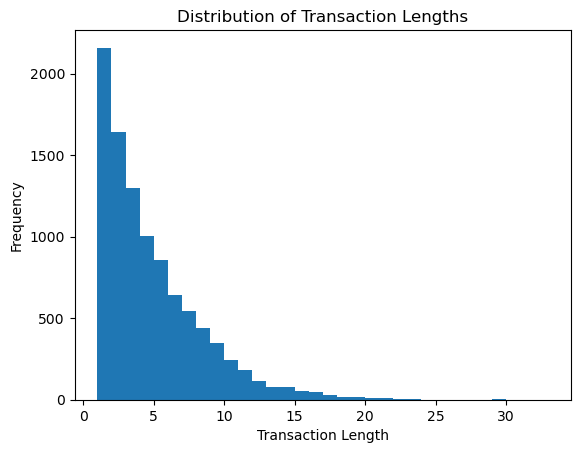

In [36]:
# Transaction analysis
transaction_lengths = df.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Transaction Length')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Lengths')
plt.show()



> **TransactionEncoder**

The "TransactionEncoder" is a crucial component when working with association rule mining, particularly when using libraries like `mlxtend` in Python.

It plays a key role in transforming the dataset into a format suitable for mining frequent itemsets and generating association rules.

Here's why we need a "TransactionEncoder":

1. **Binary Representation:**
   - Association rule mining algorithms typically work with binary data, where the presence or absence of an item in a transaction is represented as 1 or 0. The "TransactionEncoder" helps convert the dataset into a binary matrix format.

2. **Sparse Matrix Efficiency:**
   - In real-world datasets, transactions often involve only a small subset of the available items, leading to a sparse matrix with many zero values. The "TransactionEncoder" efficiently handles sparse matrices by only storing the non-zero entries, saving memory and computation.

3. **Compatibility with ML Libraries:**
   - Libraries like `mlxtend` and `scikit-learn` expect data in a specific format. The "TransactionEncoder" helps conform the dataset to the expected input format, making it compatible with various machine learning tools and libraries.

4. **Itemset Representation:**
   - The "TransactionEncoder" is used to transform the original dataset, which may be in the form of lists of items per transaction, into a format where each row represents a transaction, and each column corresponds to an item, with entries indicating whether the item is present in the transaction or not.

In [20]:
groceries = []
for i in range(9835):
  groceries.append([str(df.values[i,j]) for j in range(32)])


# Initialize transaction encoder
encoder = TransactionEncoder()

# Fit and Transform the data
transactions = encoder.fit(groceries).transform(groceries)
transactions[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

This is a tedious way to look at the data. So let's convert it into a data frame that makes it easier to visually understand the data.

In [21]:
itemsets = pd.DataFrame(transactions, columns=encoder.columns_)
itemsets.drop('nan', axis=1, inplace=True)
itemsets.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
n_rows, n_items = itemsets.shape

print(f"No. of Samples  : {n_rows}")
print(f"No. of Products : {n_items}")

No. of Samples  : 9835
No. of Products : 169


# **Generating frequent item sets**

As highlighted earlier, the cornerstone of market basket analysis lies in the **generation of frequent itemsets**. Several methods exist to achieve this goal, such as **Apriori Algorithm**.

This technique is instrumental in extracting patterns from transactional data, revealing associations among items frequently purchased together. In the subsequent sections, we will delve into each of these methods, exploring their principles and applications in uncovering valuable insights within market basket analysis.

### **Support**


Support is a key metric in association rule mining that measures the frequency or occurrence of a specific itemset in a dataset. It provides information about how often a particular combination of items appears together in transactions. The support of an itemset is calculated as the proportion of transactions in the dataset that contain that itemset.

The formula for support is:

> $Support(X) =$ ***Number of Transactions Containing X / Total Number of Transactions***

Here:
- Support(X) represents the support of the itemset X.
- The numerator is the count of transactions where the itemset X appears.
- The denominator is the total number of transactions in the dataset.

**Interpretation:**

- A high support value indicates that the itemset is frequent, occurring regularly in the dataset.

- A low support value suggests that the itemset is infrequent, appearing in only a small fraction of transactions.

**Use in Association Rule Mining:**

- Support is crucial for identifying frequent itemsets in the dataset.

- Frequent itemsets serve as the foundation for generating association rules.

- Analysts typically set a minimum support threshold to focus on meaningful and frequent itemsets.

**Example:**

In a retail dataset, if the support of the itemset {milk, bread} is 0.2, it means that these two items (milk and bread) appear together in 20% of the total transactions in the dataset.

Support is a vital metric, providing insights into the prevalence of specific combinations of items and helping in decision-making processes in areas such as market basket analysis and recommendation systems.

## **Apriori Algorithm**

We have already discussed the theoretical details of the algorithms. So we will directly move to the implementation part. Remember that for the working of this algorithm, we need to set a minimum threshold for our item sets.

Let's consider that we are looking for item sets that occur at least **5 times a day**. Now, considering that we have a data of **30 days** and including **9835 transactions**, this turns out to be around **0.015**.

In [23]:
# Computing the minimum support threshold
minimum_support_threshold = round((30/n_rows) * 5, 5)

print(f"Minimum Support Threshold: {minimum_support_threshold}")

Minimum Support Threshold: 0.01525


In [45]:
%%time

# Applying the algorithm
freq_itemsets = apriori(itemsets, minimum_support_threshold, use_colnames=True, max_len=3)


CPU times: user 146 ms, sys: 7.02 ms, total: 153 ms
Wall time: 151 ms


In [46]:
freq_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
171,0.017895,"(rolls/buns, whole milk, other vegetables)"
172,0.023183,"(root vegetables, whole milk, other vegetables)"
173,0.017082,"(tropical fruit, whole milk, other vegetables)"
174,0.022267,"(whole milk, yogurt, other vegetables)"


If you're familiar with the $support$ metric, you can skip the code. Otherwise, let's delve into this example. We've extracted the **Top-5 $support$ values**, and if you recall the histogram we created earlier for item sets of **length 1**, you'll notice that the most frequently occurring item was **"whole milk."**

This observation aligns seamlessly with our current analysis. The highest **$support$ value** is indeed associated with **"whole milk."** This correlation is expected since **$support$,** in essence, *calculates the total number of occurrences of a value in the entire dataset*.

In this context, the elevated $support$ value for "whole milk" accurately reflects its dominance in the dataset, underscoring its significance in market basket analysis.

In [47]:
freq_itemsets.nlargest(n = 10, columns = 'support')

,support,itemsets
69,0.255516,(whole milk)
44,0.193493,(other vegetables)
52,0.183935,(rolls/buns)
59,0.174377,(soda)
70,0.139502,(yogurt)
6,0.110524,(bottled water)
53,0.108998,(root vegetables)
64,0.104931,(tropical fruit)
57,0.098526,(shopping bags)
55,0.093950,(sausage)


Let's continue with the creation of our frequent item sets and have a look at the most frequent item sets based on their support value.

In [50]:
freq_itemsets.sort_values('support', ascending=False)

,support,itemsets
69,0.255516,(whole milk)
44,0.193493,(other vegetables)
52,0.183935,(rolls/buns)
59,0.174377,(soda)
70,0.139502,(yogurt)
...,...,...
155,0.015658,"(sausage, shopping bags)"
175,0.015557,"(rolls/buns, yogurt, whole milk)"
138,0.015557,"(root vegetables, pip fruit)"
121,0.015353,"(newspapers, yogurt)"


Once again, our observation is reaffirmed; however, concerning our objective, this is not precisely what we are seeking. Item sets of length one don't align with our primary interest. Instead, our focus is on item sets of length two or greater.

It's within these longer item sets that we anticipate discovering meaningful associations and patterns indicative of customer purchasing behavior.

In [51]:
# Computing lengths and creating a logical filter
lengths = [len(itemset) for itemset in freq_itemsets.itemsets]
freq_itemsets[[val>2 for val in lengths]]

,support,itemsets
171,0.017895,"(rolls/buns, whole milk, other vegetables)"
172,0.023183,"(root vegetables, whole milk, other vegetables)"
173,0.017082,"(tropical fruit, whole milk, other vegetables)"
174,0.022267,"(whole milk, yogurt, other vegetables)"
175,0.015557,"(rolls/buns, yogurt, whole milk)"


Let's have a deeper look at the frequent itemsets based on their length.

In [29]:
freq_itemsets.groupby(lengths)['support'].describe()

,count,mean,std,min,25%,50%,75%,max
1,71.0,0.054522,0.046141,0.016268,0.025419,0.037417,0.068277,0.255516
2,100.0,0.024897,0.010061,0.015252,0.018480,0.021149,0.027885,0.074835
3,5.0,0.019197,0.003344,0.015557,0.017082,0.017895,0.022267,0.023183


Observing the results, it becomes evident that item sets of length two are prevalent, indicated by the count of exactly 100, which is the highest. However, it's noteworthy that the mean value for support is considerably higher for item sets of length 1 compared to those of length 2 or 3.

This observation underscores that item sets of length one exhibit higher frequency or support in the dataset. The disparity in mean support values between different item set lengths highlights the varying degrees of prevalence among these sets, shedding light on their respective significance in the context of market basket analysis.

# **Association Rules**

Now that we have the item sets it's time to generate the Association Rules and evaluate them and most importantly identify the Actionable Association Rules. In order to do so we need to define 2 things,

- **Metric**: We have already seen all the metrics used to identify the Association Rules, here we select the one out all, that will server as the main metric to generate the association rules.

- **Threshold**: After selecting the metric we need to set an appropriate threshold value with respect to the metric.

### **Confidence**

**Confidence:**

Confidence is another crucial metric in association rule mining that quantifies the strength of an association between two items in a rule. Specifically, it measures the likelihood that the presence of one item (antecedent) in a transaction will also be accompanied by the presence of another item (consequent). In other words, confidence assesses the conditional probability of the consequent given the antecedent.

The mathematical formula for confidence is:

> $Confidence(A→B)= Support(A∪B)/Support(A)$

Here:

- Confidence(A -> B) represents the confidence of the rule A -> B.
- Support(A ∪ B) is the support of the combined itemset {A, B}.
- Support(A) is the support of the antecedent itemset A.

**Interpretation:**

- A high confidence value (close to 1) indicates a strong likelihood that if the antecedent (A) is present in a transaction, the consequent (B) will also be present.

- A low confidence value (closer to 0) suggests a weaker association between the antecedent and consequent.

**Use in Association Rule Mining:**

- Confidence helps in identifying rules that are likely to be true or have a strong association.

- Analysts often set a minimum confidence threshold to filter out weaker rules and focus on those with a higher likelihood of being true.

**Example:**

Consider the rule {milk} -> {bread} with a confidence of 0.7. It implies that when milk is present in a transaction, there is a 70% chance that bread will also be present in the same transaction.

Confidence is valuable for decision-making and strategy formulation, especially in scenarios like market basket analysis where understanding the strength of associations between items is crucial for effective business insights.

In [52]:
rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.25)

In [55]:
rules = rules.drop(columns=['leverage', 'zhangs_metric','jaccard','representativity', 'certainty', 'kulczynski'], errors='ignore')


In [56]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,1.292416
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,1.332628
2,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,1.251315
3,(bottled beer),(whole milk),0.080529,0.255516,0.020437,0.253788,0.993237,0.997684
4,(bottled water),(soda),0.110524,0.174377,0.028978,0.262190,1.503577,1.119017


If you look closely in addition to the metric we set we also get all the other metrics, this allow us for better decision making.

In [33]:
print(f'Total Number of Association Rules: {rules.shape[0]}')

Total Number of Association Rules: 74


Because the output is a DataFrame all the pandas operations are still valid making it easier to navigate.

In [ ]:
# Convert the itemsets to string format for better readability (thanks to ChatGPT)
rules_copy = rules.copy()
rules_copy['antecedents'] = rules_copy['antecedents'].apply(lambda x: ', '.join(x))
rules_copy['consequents'] = rules_copy['consequents'].apply(lambda x: ', '.join(x))


In [37]:
!pip install networkx

import networkx as nx
G = nx.from_pandas_edgelist(rules_copy,
                            source='antecedents',
                            target='consequents',
                            edge_attr='confidence'
                            # edge_attr=True
                           )

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.2 MB/s eta 0:00:00


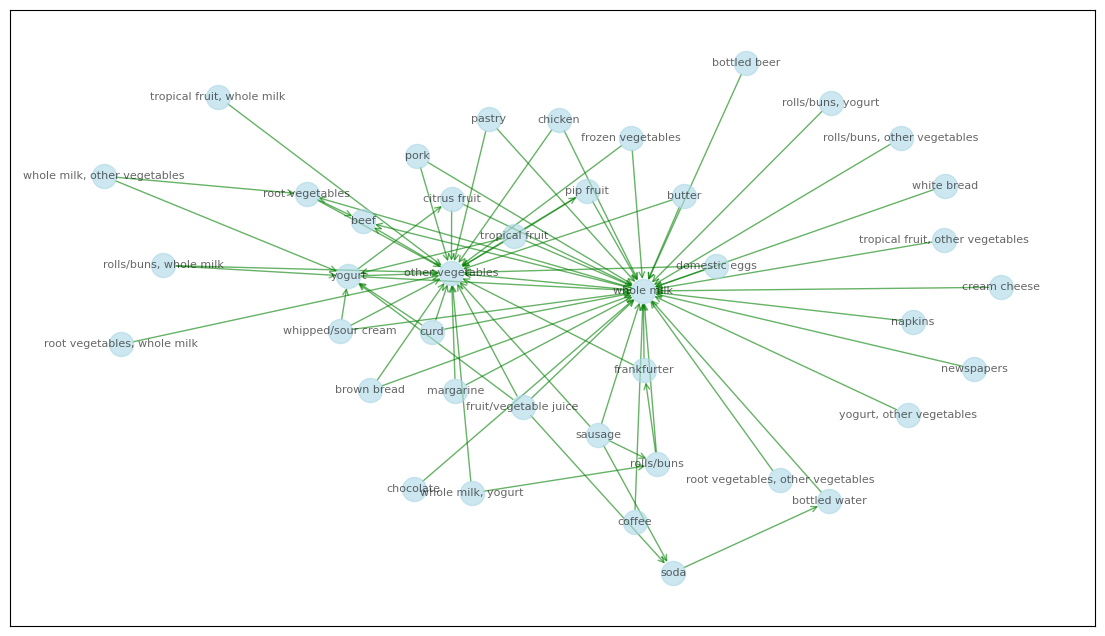

In [82]:
plt.figure(figsize=(14, 8))
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='green',
                 font_size=8,
                 node_color='lightblue'
                )
plt.show()

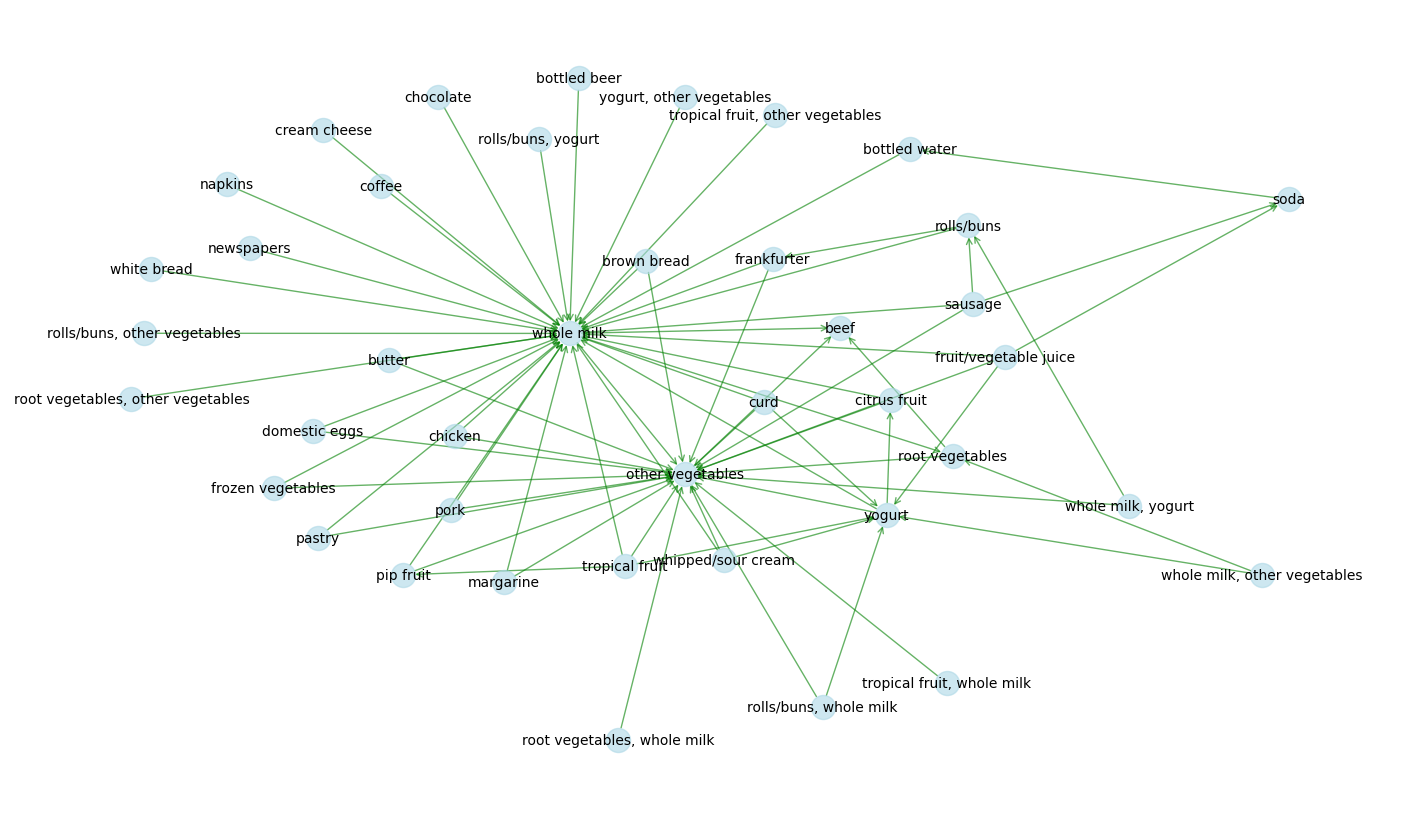

In [77]:
plt.figure(figsize=(14, 8))
nx.draw_kamada_kawai(G,
                     arrows=True,
                     arrowstyle='<-',
                     with_labels=False,
                     cmap='cividis',
                     alpha=0.6,
                     edge_color='green',
                     font_size=8,
                     node_color='lightblue',
                    )
nx.draw_networkx_labels(G,
                        pos=nx.kamada_kawai_layout(G),
                        font_size=10,
                        font_color='black',
                        font_family='sans-serif',
                        font_weight='normal',
                        )
plt.show()

In [ ]:
rules[rules['antecedents'] == {'rolls/buns'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
51,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.075696


We have only a single **Association Rule** with *'rolls/buns'* as the **Antecedent**.

In [ ]:
rules[rules['consequents'] == {'rolls/buns'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
24,(frankfurter),(rolls/buns),0.058973,0.183935,0.019217,0.325862,1.771616,1.210531
50,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,1.210344
71,"(whole milk, yogurt)",(rolls/buns),0.056024,0.183935,0.015557,0.277677,1.509648,1.129779


We have 3 **Association Rule** with *'rolls/buns'* as the **Consequents**. Let's have a look at all the **Antecedents** with length greater than 1.

In [ ]:
rules[rules['antecedents'].str.len()>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
61,"(whole milk, rolls/buns)",(other vegetables),0.056634,0.193493,0.017895,0.315978,1.633026,1.179067
62,"(other vegetables, rolls/buns)",(whole milk),0.042603,0.255516,0.017895,0.420048,1.643919,1.283699
63,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,1.290900
64,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.533320
65,"(other vegetables, root vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.457687
66,"(tropical fruit, whole milk)",(other vegetables),0.042298,0.193493,0.017082,0.403846,2.087140,1.352851
67,"(tropical fruit, other vegetables)",(whole milk),0.035892,0.255516,0.017082,0.475921,1.862587,1.420556
68,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,1.338511
69,"(whole milk, other vegetables)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,1.225003
70,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.528340


This way we can extract may association rules, but the most important thing is to make sure that the association rule makes sense.

# **Association Rule Evaluation**

A quick way to get the big picture of the Association Rules is to use the `describe()` method.

In [ ]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,conviction
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.074960,0.212240,0.026144,0.358847,1.738075,1.238766
std,0.036821,0.045131,0.012113,0.068516,0.361191,0.112300
min,0.034367,0.104931,0.015557,0.253714,0.993237,0.997684
25%,0.053279,0.193493,0.018709,0.308374,1.503846,1.162070
50%,0.064159,0.193493,0.022267,0.349928,1.664961,1.225400
75%,0.082766,0.255516,0.028953,0.404741,1.918319,1.291559
max,0.255516,0.255516,0.074835,0.512881,3.040367,1.533320


In [88]:
rules.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
70,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.528340
9,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.480817
19,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.461085
64,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.457687
67,"(tropical fruit, other vegetables)",(whole milk),0.035892,0.255516,0.017082,0.475921,1.862587,1.420556
63,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.533320
22,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,1.412030
71,"(rolls/buns, yogurt)",(whole milk),0.034367,0.255516,0.015557,0.452663,1.771563,1.360192
57,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,1.352735
52,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,1.350401


### **Lift**


Lift is a metric used in association rule mining to measure the strength of a rule by comparing the observed support of the rule with the expected support under the assumption of independence between the antecedent and consequent. It helps assess whether the presence of the antecedent has a significant impact on the likelihood of the consequent.

The formula for lift is given by:

> $Lift(A → B) =$ $Support(A  ∪ B)$ $/$ $(Support(A)$ $x$ $Support(B))$

Here:
- $Lift(A → B)$ represents the lift of the rule A -> B.
- $Support(A  ∪ B)$ is the support of the combined itemset {A, B}.
- $Support(A)$ is the support of the antecedent itemset A.
- $Support(B)$ is the support of the consequent itemset B.

**Interpretation:**

- Lift greater than 1 indicates that the antecedent and consequent appear together more often than expected by chance, suggesting a positive correlation or association.

- Lift equal to 1 implies that the antecedent and consequent are independent; the rule has no significant impact on the likelihood of the consequent.

- Lift less than 1 suggests that the antecedent and consequent appear together less often than expected by chance, indicating a negative or avoidance association.

**Use in Association Rule Mining:**

- Lift helps in identifying rules that are more interesting than random associations.

- A lift value greater than 1 is often considered significant, indicating a positive association.

**Example:**

Consider the rule {milk} -> {bread} with a lift of 1.5. It implies that the likelihood of buying bread when milk is purchased is 1.5 times higher than the expected likelihood based on the independent occurrences of milk and bread.

Lift is a valuable metric for assessing the significance of association rules and is commonly used alongside support and confidence for a comprehensive analysis of rule patterns.

We know that **lift** is one of the main criteria used in **association rule** to detect the **best association rules**. The value of **lift** ranges between **0 to ∞** where the value of **1** indicates complete independence between antecedent and consequent.

In [92]:
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,1.332628
65,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,1.290900
47,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,1.226392
63,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.533320
20,(curd),(yogurt),0.053279,0.139502,0.017285,0.324427,2.325615,1.273732
39,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.426693
10,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,1.383521
69,"(whole milk, other vegetables)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,1.225003
66,"(tropical fruit, whole milk)",(other vegetables),0.042298,0.193493,0.017082,0.403846,2.087140,1.352851
42,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,1.350565


In [91]:
rules.sort_values('lift', ascending=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
3,(bottled beer),(whole milk),0.080529,0.255516,0.020437,0.253788,0.993237,0.997684
51,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.075696
5,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,1.080446
54,(sausage),(whole milk),0.093950,0.255516,0.029893,0.318182,1.245252,1.091910
16,(coffee),(whole milk),0.058058,0.255516,0.018709,0.322242,1.261141,1.098451
36,(pastry),(other vegetables),0.088968,0.193493,0.022572,0.253714,1.311235,1.080695
12,(chocolate),(whole milk),0.049619,0.255516,0.016675,0.336066,1.315243,1.121322
35,(newspapers),(whole milk),0.079817,0.255516,0.027351,0.342675,1.341110,1.132597
25,(frankfurter),(whole milk),0.058973,0.255516,0.020539,0.348276,1.363029,1.142330
30,(fruit/vegetable juice),(whole milk),0.072293,0.255516,0.026640,0.368495,1.442160,1.178904


The first row contains the **antecedent** `beef` and the **consequent** `root vegetables`, with a **lift score** of $3.04$. That means that customers who buy `beef` are $3.04$ more times likely to buy `root vegetables`. Keep in mind that lift values above 1 indicates **high likelihood** whereas lift values below 1 indicates **low likelihood**.


### **Conviction**


Conviction is a metric used in association rule mining that quantifies the degree of implication between the antecedent and consequent of a rule. It helps assess the strength of the rule by considering how much the rule's confidence exceeds the expected confidence under the assumption of independence between the antecedent and consequent.

The formula for conviction is given by:

> $Conviction(A → B) = 1 - Support(B) / (1 - Confidence(A → B))$

Here:
- $Conviction(A → B)$ represents the conviction of the rule A -> B.
- $Support(B)$ is the support of the consequent itemset B.
- $Confidence(A → B)$ is the confidence of the rule A -> B.

**Interpretation:**

- High conviction values indicate that the rule has a strong implication between the antecedent and consequent.

- Conviction equal to 1 implies that the antecedent and consequent are independent; the rule does not provide any meaningful implication.

- Low conviction values suggest weaker implications between the antecedent and consequent.

**Use in Association Rule Mining:**

- Conviction is used to assess the conclusiveness of a rule.

- A high conviction value suggests a strong implication, making the rule more interesting.

**Example:**

Consider the rule {milk} -> {bread} with a conviction of 2. It implies that the rule is twice as likely to be true as the assumption of independence would predict.

Conviction is a valuable metric for understanding the conclusiveness of association rules, particularly in cases where strong implications between items are crucial for decision-making, such as in market basket analysis or recommendation systems.

In [ ]:
rules.sort_values('conviction', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction
64,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.533320
70,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.528340
9,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.480817
19,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.461085
65,"(other vegetables, root vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.457687


Looking at the $Top-5$ `conviction scores`, we can see that out of the $Top-5$, the $Top-4$ contains `milk` as the **consequent** with scores above $1.45$. That shows that for **antecedents**, the **consequent** is $1.45 times$ dependent on the antecedent, for `milk` the antecedent are **yogurt, vegetable, butter, curd and root vegetables**.